## Method and Results

**Import Library**

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Read Data**

In [2]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


**Clean the Data**

In [3]:
players_tidy <- players |>
                select(experience, subscribe, played_hours, Age, gender)

players_tidy

experience,subscribe,played_hours,Age,gender
<chr>,<lgl>,<dbl>,<dbl>,<chr>
Pro,TRUE,30.3,9,Male
Veteran,TRUE,3.8,17,Male
Veteran,FALSE,0.0,17,Male
Amateur,TRUE,0.7,21,Female
Regular,TRUE,0.1,21,Male
Amateur,TRUE,0.0,17,Female
Regular,TRUE,0.0,19,Female
Amateur,FALSE,0.0,21,Male
Amateur,TRUE,0.1,17,Male


**Variable Visualization**

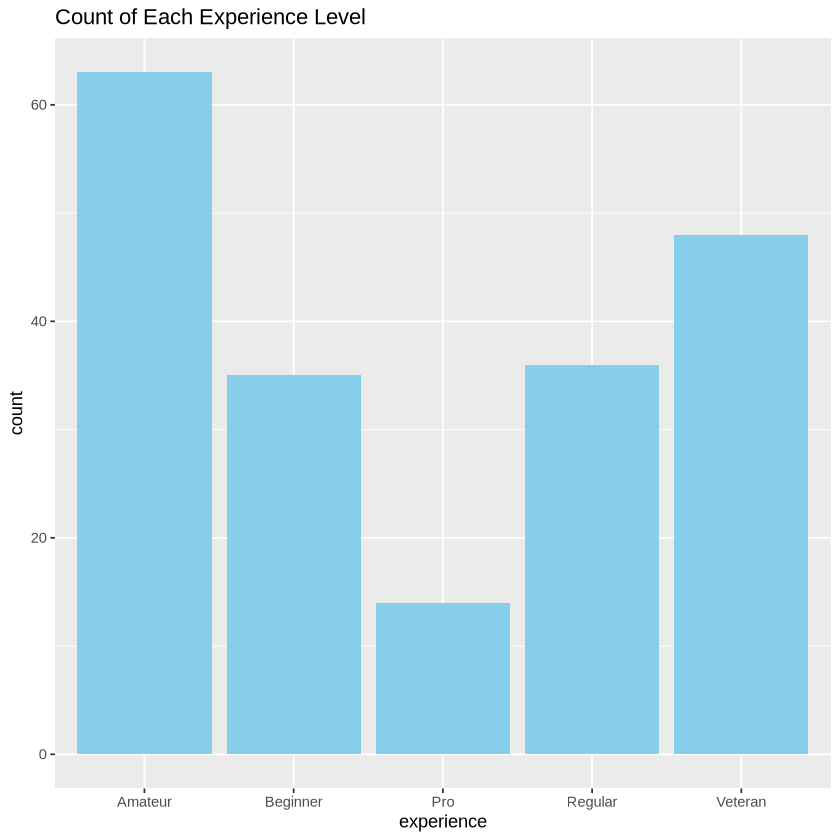

In [4]:
ggplot(players_tidy, aes(x = experience)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Count of Each Experience Level")

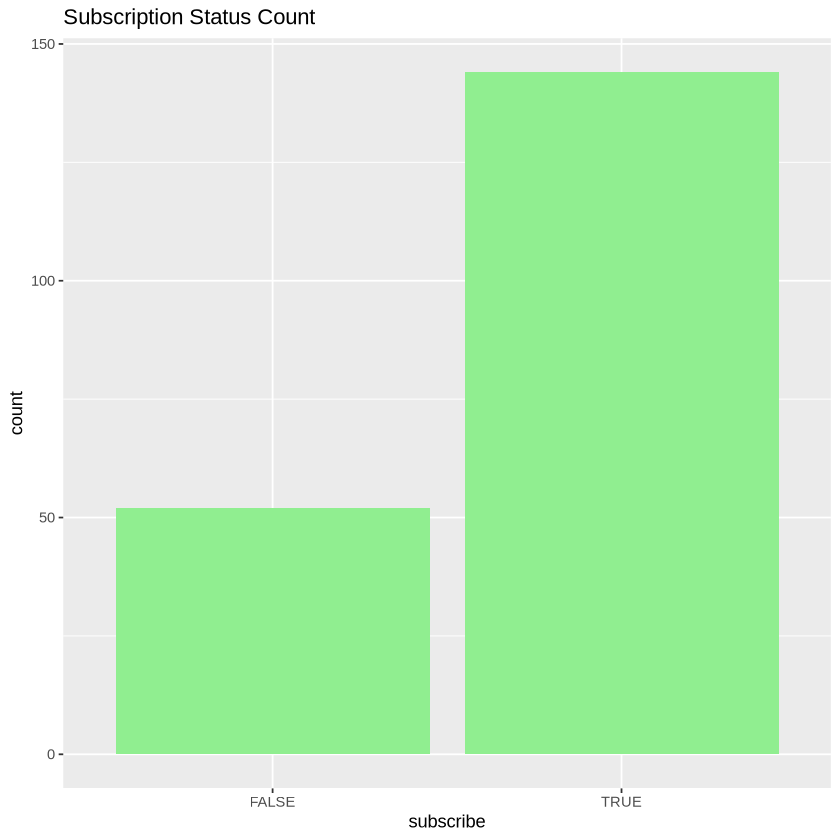

In [5]:
ggplot(players_tidy, aes(x = subscribe)) +
  geom_bar(fill = "lightgreen") +
  labs(title = "Subscription Status Count")

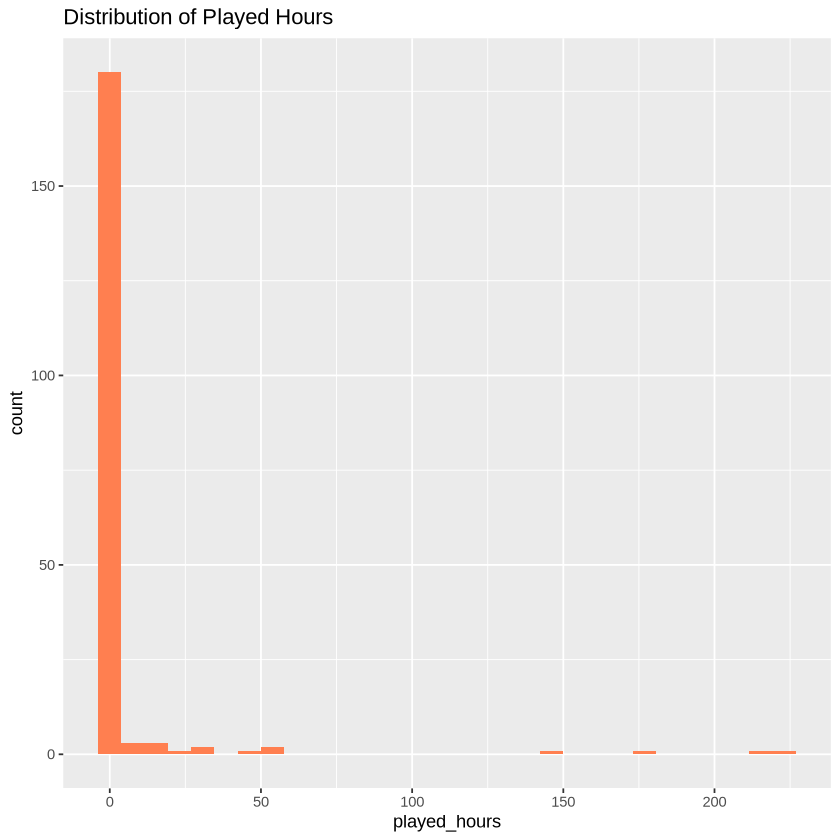

In [6]:
ggplot(players_tidy, aes(x = played_hours)) +
  geom_histogram(bins = 30, fill = "coral") +
  labs(title = "Distribution of Played Hours")

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


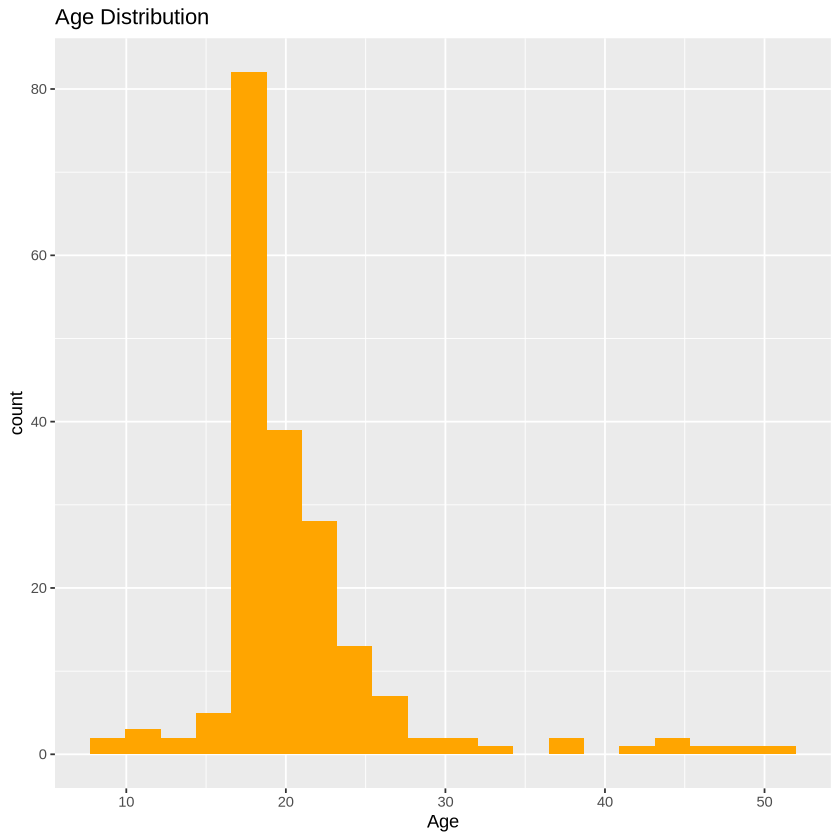

In [7]:
ggplot(players_tidy, aes(x = Age)) +
  geom_histogram(bins = 20, fill = "orange") +
  labs(title = "Age Distribution")

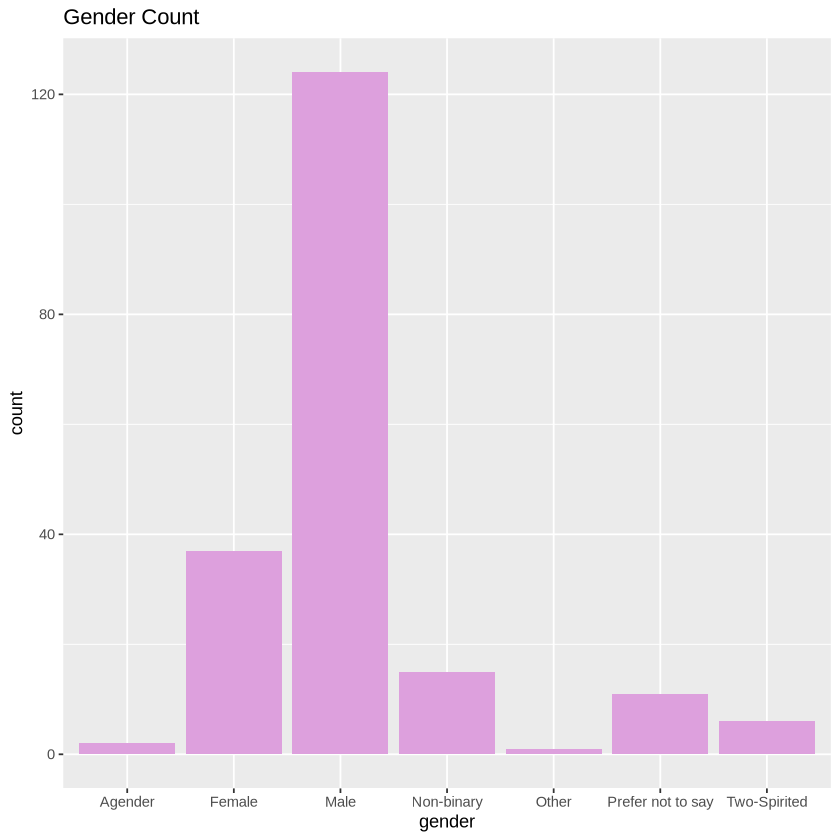

In [8]:
ggplot(players_tidy, aes(x = gender)) +
  geom_bar(fill = "plum") +
  labs(title = "Gender Count")

**Set subscribe as factor**

In [9]:
players_tidy <- players_tidy |>
  mutate(subscribe = as.factor(subscribe))

**Splitting the Data**

In [10]:
set.seed(123)

data_split <- initial_split(players_tidy, prop = 0.8, strata = subscribe)
train_data <- training(data_split)
test_data  <- testing(data_split)

**Tuning Workflow**

In [11]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
  set_engine("kknn") |> 
  set_mode("classification")

subscribe_recipe <- recipe(subscribe ~ ., data = train_data) |>
  step_dummy(all_nominal_predictors()) |>
  step_normalize(all_numeric_predictors())

subscribe_wf <- workflow() |> 
  add_model(knn_spec) |> 
  add_recipe(subscribe_recipe)

**Cross-validation (CV) folds**

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 30 rows.
               ✖ Assigned data has 31 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 31 to size 30.

There were issues with some computations   A: x1

→ B | warning: ! There are new levels in `gender`: "Other".
               ℹ Consider using step_novel() (`?recipes::step_novel()`) \ before
                 `step_dummy()` to handle unseen values.

There were issues with some computations   A: x1
There were issues with some computations   A: x2   B: x1





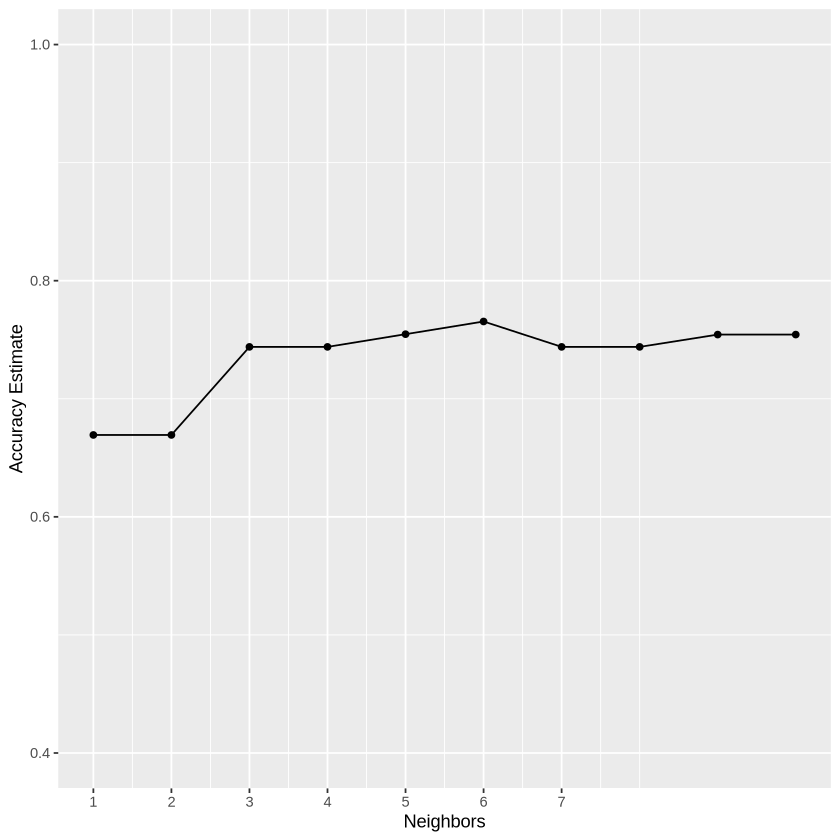

In [12]:
set.seed(123)

cv_folds <- vfold_cv(train_data, v = 5)

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

set.seed(123)

subscribe_results <- subscribe_wf |>
    tune_grid(resamples = cv_folds, grid = gridvals) |>
    collect_metrics()

accuracies <- subscribe_results |>
  filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 7, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

cross_val_plot

**Pulling Best K-neighbor from Tuning & Make the Workflow based on the Best K-neighbor**

In [13]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |> 
  set_engine("kknn") |> 
  set_mode("classification")

subscribe_recipe <- recipe(subscribe ~ ., data = train_data) |>
  step_dummy(all_nominal_predictors()) |>
  step_normalize(all_numeric_predictors())

subscribe_wf <- workflow() |> 
  add_model(knn_spec) |> 
  add_recipe(subscribe_recipe)

subscribe_fit <- subscribe_wf |>
  fit(data = train_data)

**Confusion Matrix**

In [14]:
test_preds <- predict(subscribe_fit, test_data) |>
  bind_cols(test_data)

metric <- metrics(test_preds, truth = subscribe, estimate = .pred_class)

conf_m <- conf_mat(test_preds, truth = subscribe, estimate = .pred_class)

conf_m

          Truth
Prediction FALSE TRUE
     FALSE     0    2
     TRUE     11   27

**Visualization**

.pred_class,experience,subscribe,played_hours,Age,gender
<fct>,<chr>,<fct>,<dbl>,<dbl>,<chr>
TRUE,Veteran,TRUE,3.8,17,Male
TRUE,Veteran,FALSE,0.0,17,Male
TRUE,Amateur,FALSE,0.0,21,Male
TRUE,Pro,TRUE,0.0,17,Male
TRUE,Amateur,TRUE,48.4,17,Female
TRUE,Regular,TRUE,0.3,8,Male
TRUE,Veteran,FALSE,0.1,18,Male
TRUE,Beginner,TRUE,0.6,26,Male
TRUE,Regular,TRUE,5.6,17,Male


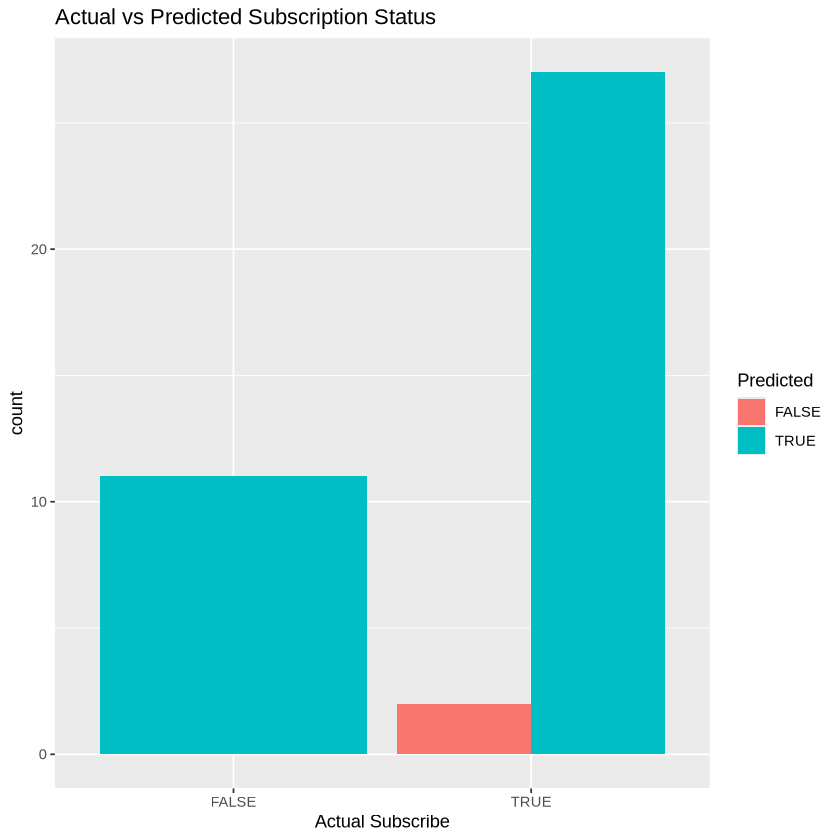

In [15]:
test_preds |> 
  ggplot(aes(x = subscribe, fill = .pred_class)) +
  geom_bar(position = "dodge") +
  labs(x = "Actual Subscribe", fill = "Predicted") +
  ggtitle("Actual vs Predicted Subscription Status")

test_preds